<a href="https://colab.research.google.com/github/AmruthaA27/Task-13--KNN-Algorithm/blob/main/ML_KNN_Assignment13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

**Importing the dataset**

In [6]:
df_data = pd.read_csv('Social_Network_Ads.csv')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df_data['Gender'])
df_data.drop("Gender", axis=1, inplace=True)
df_data["Gender"] = label
df_data

,User ID,Age,EstimatedSalary,Purchased,Gender
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [ ]:
X = df_data[["User ID","Gender","Age","EstimatedSalary"]]
Y = df_data[['Purchased']]
X.head(5)

**Splitting the dataset into the Training set and Test set**

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.4,random_state = 4)

**Feature Scaling**

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train

,User ID,Gender,Age,EstimatedSalary
71,15726358,0,24,27000
20,15649487,1,45,22000
337,15612465,1,35,79000
214,15622478,1,47,43000
271,15688172,0,59,76000
...,...,...,...,...
360,15577514,1,43,129000
385,15775335,1,56,60000
197,15680243,0,20,36000
174,15644296,0,34,72000


**Fitting K-NN to the Training set**

In [11]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors = 10)
knn_model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=10)

**Predicting the Test set results**

In [20]:
knn_predict = knn_model.predict(x_test)
#knn_predict
knn_predict_bin = []
for value in knn_predict:
  if value<0.5:
    knn_predict_bin.append(0)
  else:
    knn_predict_bin.append(1)

knn_predict_bin_arr = np.array(knn_predict_bin)
#print(knn_predict_bin[:20])
#print(y_test[:20])



**Making the Confusion Matrix**

In [21]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,knn_predict_bin_arr)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])


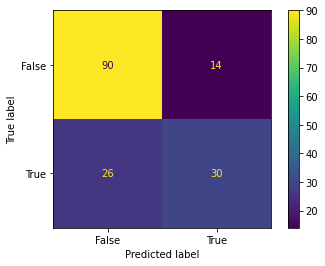

In [22]:
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()